In [1]:
from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
import netCDF4
import numpy as np
import xarray as xr
from cftime import num2pydate
from metpy.units import units
from siphon.catalog import TDSCatalog
from xarray.backends import NetCDF4DataStore

from data import GetGFSData
from indices import CalculateIndices
from charts import CalculateCharts

In [2]:
URL = 'http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p25deg/catalog.xml'
dataset = 'Latest Collection for GFS Quarter Degree Forecast'

variables = ['Relative_humidity_isobaric',
             'Temperature_isobaric',
             'u-component_of_wind_isobaric',
             'v-component_of_wind_isobaric',
             'Best_4_layer_Lifted_Index_surface',
             'Geopotential_height_isobaric',
             'Precipitable_water_entire_atmosphere_single_layer']

gfs = GetGFSData(variables)
data = gfs.get()

Process done in 68.35902500152588 seconds


In [3]:
indices = CalculateIndices(data)

k_index = indices.k()
tt_index = indices.tt()
li_index = indices.li()
sweat_index = indices.sweat()

In [7]:
charts = CalculateCharts(data)
humidity = charts.clouds_humidity()

AttributeError: 'Dataset' object has no attribute 'data'

In [29]:
from variables import ExtractVariables
from charts import CalculateCharts
variables = ExtractVariables(data)
charts = CalculateCharts(data)
lon_2d, lat_2d = variables.coordinates()

In [30]:
tair_850 = variables.temperature(850)


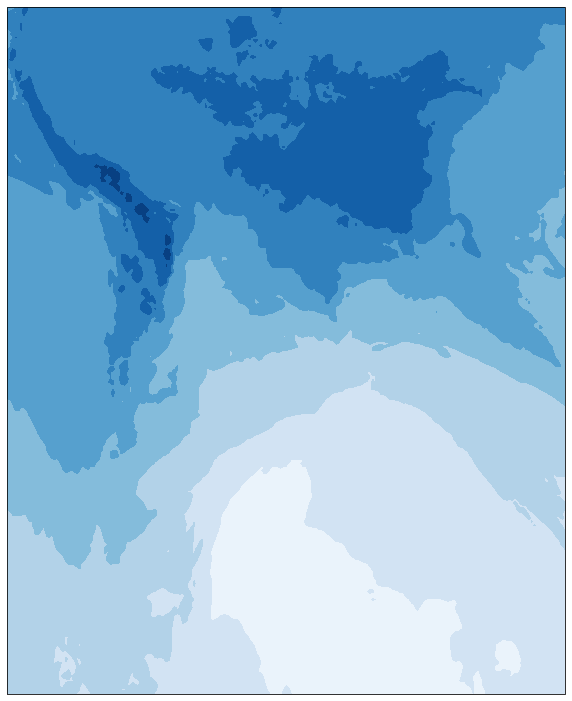

In [32]:
plotcrs = ccrs.cartopy.crs.Mercator(central_longitude=0.0,
                                    min_latitude=-80.0,
                                    max_latitude=84.0,
                                    globe=None,
                                    latitude_true_scale=None,
                                    false_easting=0.0,
                                    false_northing=0.0,
                                    scale_factor=None)

# Create new figure
fig = plt.figure(figsize=(10, 12))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, .02], bottom=.07, top=.99,
                        hspace=0.01, wspace=0.01)

# Add the map and set the extent
ax = plt.subplot(gs[0], projection=plotcrs)
# plt.title(f'850mb Temperature Advection for {time:%d %B %Y %H:%MZ}', fontsize=16)
ax.set_extent([-30., -80., 0., -50.])

ax.contourf(lon_2d, lat_2d, tair_850, cmap='Blues', transform=ccrs.PlateCarree())

In [36]:
create_charts = charts.CalculateCharts(data)
rain = create_charts.clouds_humidity()

AttributeError: module 'data' has no attribute 'variables'